# Assignment Part - I

## 1. Data Understanding and Exploration

In [1]:
# Importing necessary libraries...
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None) # displaying all rows and columns of a dataframe
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore') # hiding warnings

In [2]:
# reading the dataset
df = pd.read_csv('train.csv')

In [3]:
# top 5 rows of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.1 Box-plot for some categorical features to depict their relationship with the target variable, SalePrice

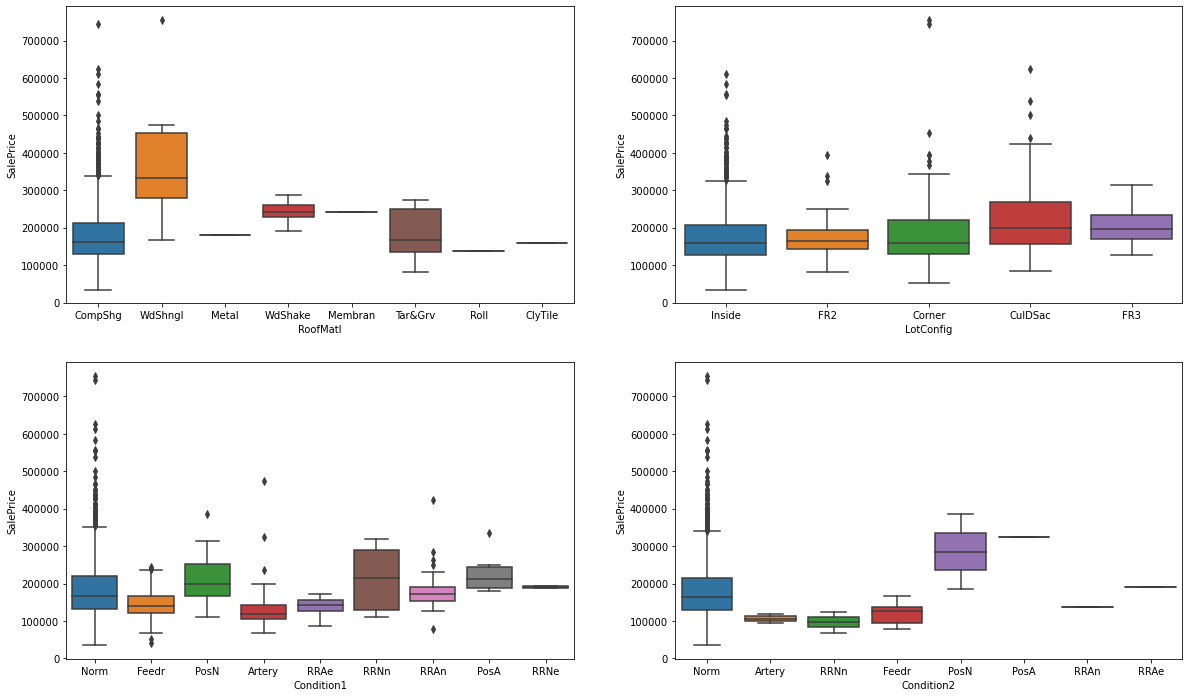

In [4]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = df)
plt.subplot(2,2,4)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = df)
plt.show()

### 1.2 Details of Continuous Variables

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 1.3 Distribution Plot for some Continuous Features

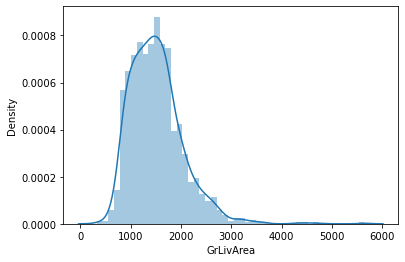

In [6]:
# GrLivArea
sns.distplot(df['GrLivArea'])
plt.show()

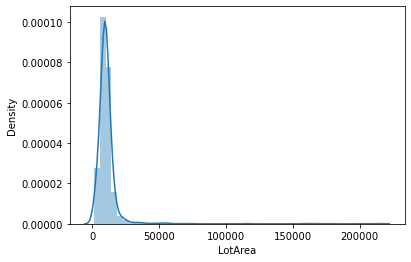

In [7]:
# LotArea
sns.distplot(df['LotArea'])
plt.show()

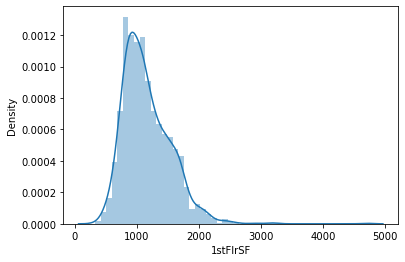

In [8]:
# 1stFlrSF
sns.distplot(df['1stFlrSF'])
plt.show()

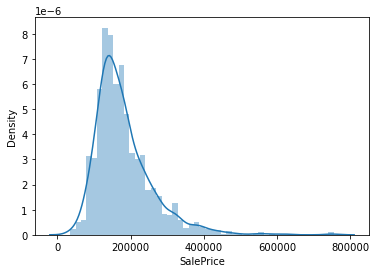

In [9]:
# SalePrice (the target label)
sns.distplot(df['SalePrice'])
plt.show()

#### Converting the distribution of the target variable (SalePrice) into a Normal Distribution by log transformation 

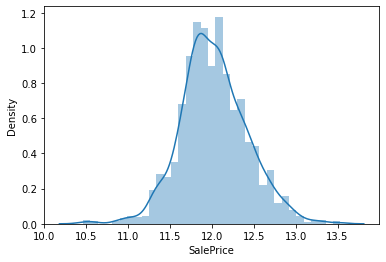

In [10]:
# log of SalePrice
sns.distplot(np.log(df['SalePrice']))
plt.show()

In [11]:
# log transformation
df['SalePrice'] = np.log(df['SalePrice'])

### 1.4 Paiwise Scatter Plot of some of the Continuous Features

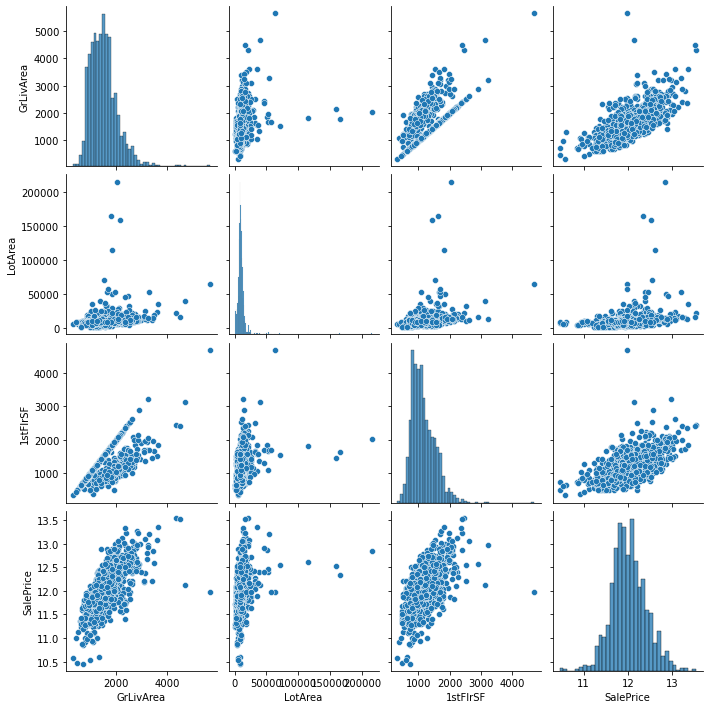

In [12]:
sns.pairplot(df[['GrLivArea', 'LotArea', '1stFlrSF', 'SalePrice']])
plt.show()

### 1.5 Plotting Correlations on a heatmap for some of the Continuous Features

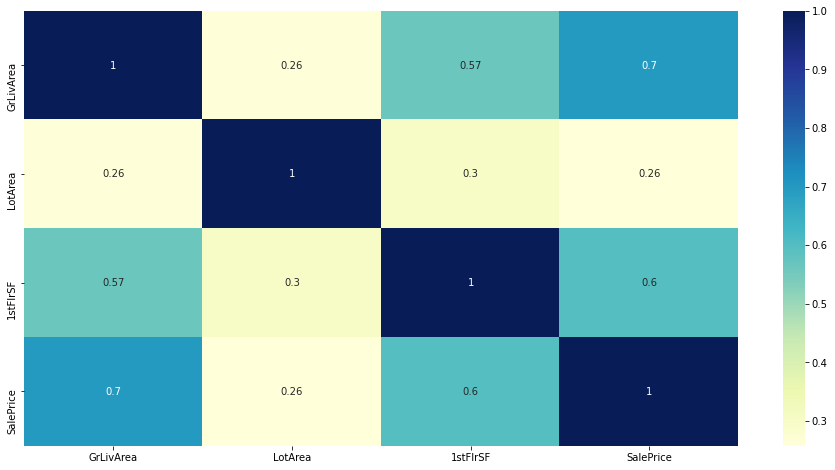

In [13]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df[['GrLivArea', 'LotArea', '1stFlrSF', 'SalePrice']].corr(), cmap="YlGnBu", annot=True)
plt.show()

#### GriLivArea is highly correlated with log of SalePrice (target) with correlation coefficient of 0.7 but LotArea is weakly correlated with log of SalePrice (target) with correlation coefficient of 0.26

## 2. Data Cleaning

In [14]:
# for categorical features with 'NA' category are read as NaN values in python. So, re-assigning those to be 'NA'
df.loc[(df.isnull()['Alley'] == True),['Alley']] = 'NA'
df.loc[(df.isnull()['BsmtQual'] == True),['BsmtQual']] = 'NA'
df.loc[(df.isnull()['BsmtCond'] == True),['BsmtCond']] = 'NA'
df.loc[(df.isnull()['BsmtExposure'] == True),['BsmtExposure']] = 'NA'
df.loc[(df.isnull()['BsmtFinType1'] == True),['BsmtFinType1']] = 'NA'
df.loc[(df.isnull()['BsmtFinType2'] == True),['BsmtFinType2']] = 'NA'
df.loc[(df.isnull()['FireplaceQu'] == True),['FireplaceQu']] = 'NA'
df.loc[(df.isnull()['GarageType'] == True),['GarageType']] = 'NA'
df.loc[(df.isnull()['GarageFinish'] == True),['GarageFinish']] = 'NA'
df.loc[(df.isnull()['GarageQual'] == True),['GarageQual']] = 'NA'
df.loc[(df.isnull()['GarageCond'] == True),['GarageCond']] = 'NA'
df.loc[(df.isnull()['PoolQC'] == True),['PoolQC']] = 'NA'
df.loc[(df.isnull()['Fence'] == True),['Fence']] = 'NA'
df.loc[(df.isnull()['MiscFeature'] == True),['MiscFeature']] = 'NA'

In [15]:
# calculating the % of NaN values for each and every column:
null_percentage = pd.DataFrame(100*df.isnull().sum(axis = 0)/df.shape[0], columns = ['%_of_null_values'])

In [16]:
# displaying columns containing NaN values with % of NaN values in them
null_percentage.loc[(null_percentage['%_of_null_values'] > 0),:].sort_values('%_of_null_values', ascending = False)

,%_of_null_values
LotFrontage,17.739726
GarageYrBlt,5.547945
MasVnrType,0.547945
MasVnrArea,0.547945
Electrical,0.068493


In [17]:
# Imputing the continuous variable, LotFrontage with median
df.loc[(np.isnan(df['LotFrontage'])), ['LotFrontage']] = df['LotFrontage'].median()

In [18]:
# deleting the rows containing NaN values for features containing 0.06% - 6% NaN values
df = df[df['GarageYrBlt'].notna()]
df = df[df['MasVnrArea'].notna()]
df = df[df['MasVnrType'].notna()]
df = df[df['Electrical'].notna()]

In [19]:
# Deriving feature, Remodelling which is a Boolean Feature depicting whether remodelling is done (1) or not (0)
df['Remodelling'] = df['YearRemodAdd'] - df['YearBuilt']
df['Remodelling'] = df['Remodelling'].apply(lambda x: 0 if x == 0 else 1) # 0 -> No, 1 -> Yes, so categorical

# Deriving feature, unsold_duration which is the duration for which the house remained unsold
df['unsold_duration'] = df['YrSold'] - df['YearBuilt'] # continuous

# Deriving feature, garage_unsold_duration which is the duration for which the garage remained unsold
df['garage_unsold_duration'] = df['YrSold'] - df['GarageYrBlt'] # continuous

In [20]:
# dropping year variables (YearBuilt, YearRemodAdd, GarageYrBlt, YrSold) as they are not potential predictors for futuristic data
df = df.loc[:,[x for x in list(df.columns) if x not in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']]]

In [21]:
# dropping 'Id' feature
df.drop('Id', axis = 1, inplace = True)

In [22]:
# interpreting textual ordered categorical variables as numerical rating-type features

std_dict = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
df['ExterQual'] = df['ExterQual'].map(std_dict)
df['ExterCond'] = df['ExterCond'].map(std_dict)
df['BsmtQual'] = df['BsmtQual'].map(std_dict)
df['BsmtCond'] = df['BsmtCond'].map(std_dict)
df['HeatingQC'] = df['HeatingQC'].map(std_dict)
df['KitchenQual'] = df['KitchenQual'].map(std_dict)
df['FireplaceQu'] = df['FireplaceQu'].map(std_dict)
df['GarageQual'] = df['GarageQual'].map(std_dict)
df['GarageCond'] = df['GarageCond'].map(std_dict)
df['PoolQC'] = df['PoolQC'].map(std_dict)

df['BsmtExposure'] = df['BsmtExposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
df['GarageFinish'] = df['GarageFinish'].map({'Fin':3, 'RFn':2, 'Unf':1, 'NA':0})
df['PavedDrive'] = df['PavedDrive'].map({'Y':2, 'P':1, 'N':0})

In [23]:
# interpreting 'MSSubClass', 'MoSold' and 'Remodelling' variables as Categorical Variables
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['MoSold'] = df['MoSold'].astype('object')
df['Remodelling'] = df['Remodelling'].astype('object')

## 3. Data Preparation

In [24]:
# spliting into X and y
X = df.loc[:,[x for x in list(df.columns) if x != 'SalePrice']]
y = df['SalePrice']

### 3.1 Handling Categorical Variables by creating dummies

In [25]:
# selecting only categorical features into dataframe, df_categorical
df_categorical = X.select_dtypes(include=['object'])

In [26]:
# converting into dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)

In [27]:
# dropping the original categorical variables
X = X.drop(list(df_categorical.columns), axis=1)

In [28]:
# concatenating dummy variables with X
X = pd.concat([X, df_dummies], axis=1)

### 3.2 Feature Scaling

### 3.3 Spliting the dataset into Train and Test Data

In [29]:
# splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=201)
cols = X_train.columns # keeping record of the column names
scaler = StandardScaler()# initializing standard scaler object
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = cols) # scaling all the variables as regularization demands scaling of all variables
X_test = pd.DataFrame(scaler.transform(X_test), columns = cols)

## 4. Model Building and Evaluation using Ridge Regression

### 4.1 Grid-Search Cross Validation for selecting optimal alpha (lamdba)

In [30]:
# list of alphas (lambdas) to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 5000]}

# instantiating Ridge Regression Model
ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    5.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 5000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=1)

In [31]:
# recording the Grid-Search Results
cv_results_ridge = pd.DataFrame(model_cv_ridge.cv_results_)

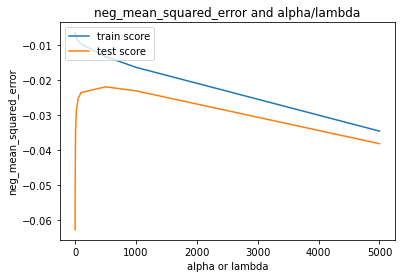

In [32]:
# plotting mean test and train scoes with alpha 
cv_results_ridge['param_alpha'] = cv_results_ridge['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_train_score'])
plt.plot(cv_results_ridge['param_alpha'], cv_results_ridge['mean_test_score'])
plt.xlabel('alpha or lambda')
plt.ylabel('neg_mean_squared_error')
plt.title("neg_mean_squared_error and alpha/lambda")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### 4.2 Finding optimal alpha (lambda) for Ridge Regression

In [33]:
cv_results_ridge.loc[(cv_results_ridge['mean_test_score'] == max(cv_results_ridge['mean_test_score'])), :]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
26,0.015692,0.002507,0.002062,0.001075,500,{'alpha': 500},-0.015227,-0.024898,-0.015173,-0.021476,-0.033273,-0.021998,0.006753,1,-0.014335,-0.012922,-0.014506,-0.013161,-0.011773,-0.013339,0.001001


#### Here, for alpha (lambda) = 500, the mean_test_score is maximum, so 500 is the optimal alpha for the Ridge Regression Model

In [34]:
# verifying with best_params_
model_cv_ridge.best_params_

{'alpha': 500}

### 4.3 Training Ridge Regression Model with optimal alpha (lambda) = 500 on the whole Training Set

In [35]:
alpha = 500

In [36]:
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=500, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
# getting the Training Set Predictions
y_train_price_ridge = ridge.predict(X_train)

In [38]:
# getting the Test Set Predictions
y_test_price_ridge = ridge.predict(X_test)

Text(0, 0.5, 'y_pred')

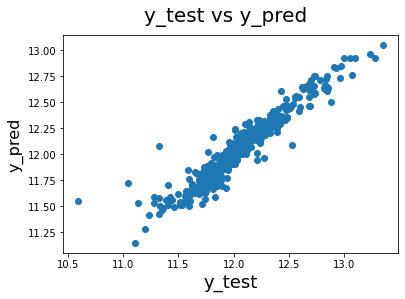

In [39]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_price_ridge)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [40]:
# The Training R-squared Score
print("Training r-squared score: ", metrics.r2_score(y_train, y_train_price_ridge))

Training r-squared score:  0.9040335234751782


In [41]:
# The Test R-Squared Score
print("Test r-squared score: ", metrics.r2_score(y_test, y_test_price_ridge))

Test r-squared score:  0.8963682255254035


#### Hence, Bias-Variance Tradeoff is maintained (No Over-fitting, No Under-fitting)

In [42]:
# Recording the coefficients for Ridge Regression for respective feature variables
ridge_coeff = pd.DataFrame({'features':list(cols), 'coefficients':ridge.coef_})

### 4.4 Most to Least Important positively correlated features

In [43]:
ridge_coeff.loc[(ridge_coeff['coefficients'] > 0)].sort_values('coefficients', ascending = False).head()

,features,coefficients
2,OverallQual,0.040445
20,GrLivArea,0.029801
32,GarageCars,0.024548
17,1stFlrSF,0.023657
27,KitchenQual,0.020676


#### Top 5 most important positively correlated features as per Ridge Regression:
##### 1. OverallQual: With 1 unit increase in overall material and finish rating (others constant), the log of the price of the house increases by 0.0404.
##### 2. GrLivArea: With 1 square feet increase in above grade living area (others constant), the log of the price of the house increases by 0.0298.
##### 3. GarageCars: With 1 car increase in the size of the garage (others constant), the log of the price of the house increases by 0.0245
##### 4. 1stFlrSF: With 1 square feet increase in 1st Floor Area (others constant), the log of the price of the house increases by 0.0236
##### 5. KitchenQual: With 1 unit increase in Kitchen Quality rating (others constant), the log of the price of the house increases by 0.0207

### 4.5 Most to Least Important negatively correlated features

In [44]:
ridge_coeff.loc[(ridge_coeff['coefficients'] < 0)].sort_values('coefficients', ascending = True).head()

,features,coefficients
87,Neighborhood_Edwards,-0.017337
116,Condition2_PosN,-0.013214
47,MSSubClass_30,-0.013001
90,Neighborhood_MeadowV,-0.012510
45,unsold_duration,-0.011835


#### Top 5 most important negatively correlated features as per Ridge Regression:
##### 1. Neighborhood_Edwards: If there is Edwards present within Ames city (others constant), the log of the price of the house decreases by 0.0173
##### 2. Condition2_PosN: If there is near positive off-site feature--park, greenbelt (others constant), the log of the price of the house decreases by 0.0132
##### 3. MSSubClass_30: If there is 1-STORY 1945 & OLDER type dwelling involved in the sale (others constant), the log of the price of the house decreases by 0.0130
##### 4. Neighborhood_MeadowV: If there is Meadow Village present within Ames city (others constant), the log of the price of the house decreases by 0.0125
##### 5. unsold_duration: With 1 year increase in the duration of the house being unsold (others constant), the log of the price of the house decreases by 0.0118

### 4.6 Most to Least Important correlated features

In [45]:
# recording the absolute coefficients of the features
ridge_coeff['absolute_coefficients'] = abs(ridge_coeff['coefficients'])
ridge_coeff[['features', 'absolute_coefficients']].sort_values('absolute_coefficients', ascending = False).head()

,features,absolute_coefficients
2,OverallQual,0.040445
20,GrLivArea,0.029801
32,GarageCars,0.024548
17,1stFlrSF,0.023657
27,KitchenQual,0.020676


#### Top 5 most important features as per Ridge Regression:
##### 1. OverallQual: With 1 unit increase in overall material and finish rating (others constant), the log of the price of the house increases by 0.0404.
##### 2. GrLivArea: With 1 square feet increase in above grade living area (others constant), the log of the price of the house increases by 0.0298.
##### 3. GarageCars: With 1 car increase in the size of the garage (others constant), the log of the price of the house increases by 0.0245.
##### 4. 1stFlrSF: With 1 square feet increase in 1st Floor Area (others constant), the log of the price of the house increases by 0.0236.
##### 5. KitchenQual: With 1 unit increase in Kitchen Quality rating (others constant), the log of the price of the house increases by 0.0207

### 5. Model Building and Evaluation using Lasso Regression

#### 5.1 Grid-Search Cross Validation for selecting optimal alpha (lamdba)

In [46]:
# list of alphas (lambdas) to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 5000]}

# instantiating Lasso Regression Model
lasso = Lasso()

# cross validation
folds = 5
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    9.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 5000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [47]:
# recording the Grid-Search Results
cv_results_lasso = pd.DataFrame(model_cv_lasso.cv_results_)

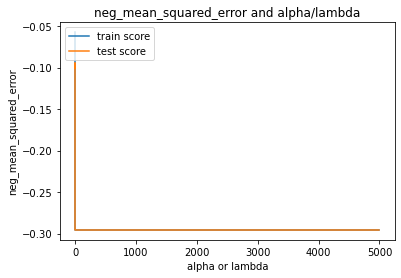

In [48]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha or lambda')
plt.ylabel('neg_mean_squared_error')
plt.title("neg_mean_squared_error and alpha/lambda")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### 5.2 Finding optimal alpha (lambda) for Lasso Regression

In [49]:
cv_results_lasso.loc[(cv_results_lasso['mean_test_score'] == max(cv_results_lasso['mean_test_score'])), :]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.269033,0.026965,0.002914,0.001813,0,{'alpha': 0.001},-0.092724,-0.100642,-0.079707,-0.110533,-0.088047,-0.09432,0.010563,1,-0.064189,-0.061406,-0.065595,-0.058104,-0.064002,-0.062659,0.002649


#### Here, for alpha (lambda) = 0.001, the mean_test_score is maximum, so 0.001 is the optimal alpha for the Lasso Regression Model

In [50]:
# verifying with best_params_
model_cv_lasso.best_params_

{'alpha': 0.001}

### 5.3 Training Lasso Regression Model with optimal alpha (lambda) = 0.001 on the whole Training Set

In [51]:
alpha = 0.001

In [52]:
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [53]:
# getting the Training Set Predictions
y_train_price_lasso = lasso.predict(X_train)

In [54]:
# getting the Test Set Predictions
y_test_price_lasso = lasso.predict(X_test)

Text(0, 0.5, 'y_pred')

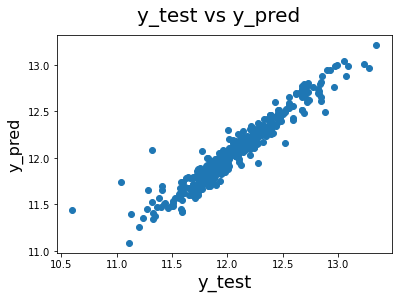

In [55]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_price_lasso)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [56]:
# The Training R-squared Score for Lasso Model
print("Training r-squared: ", metrics.r2_score(y_train, y_train_price_lasso))

Training r-squared:  0.9392408966695606


In [57]:
# The Test R-squared Score for Lasso Model
print("Test r-squared: ", metrics.r2_score(y_test, y_test_price_lasso))

Test r-squared:  0.9141533547528187


#### Hence, Bias-Variance Tradeoff is maintained (No Over-fitting, No Under-fitting)

In [58]:
# Recording the coefficients for Lasso Regression for respective feature variables
lasso_coeff = pd.DataFrame({'features':list(cols), 'coefficients':lasso.coef_})

### 5.4 Most to Least Important positively correlated features

In [59]:
lasso_coeff.loc[(lasso_coeff['coefficients'] > 0),:].sort_values('coefficients', ascending = False).head()

,features,coefficients
136,RoofMatl_CompShg,0.210635
140,RoofMatl_Tar&Grv,0.125800
142,RoofMatl_WdShngl,0.119915
20,GrLivArea,0.109601
2,OverallQual,0.073270


#### Top 5 most important positively correlated features as per Lasso Regression:
##### 1. RoofMatl_CompShg: If Roof material is Standard (Composite) Shingle (others constant), the log of the price of the house increases by 0.2106
##### 2. RoofMatl_Tar&Grv: If Roof material is Gravel & Tar (others constant), the log of the price of the house increases by 0.1258
##### 3. RoofMatl_WdShngl: If Roof material is Wood Shingles, the log of the price of the house increases by 0.1199
##### 4. GrLivArea: With 1 square feet increase in above grade living area (others constant), the log of the price of the house increases by 0.1096
##### 5. OverallQual: With 1 unit increase in material and finish rating (others constant), the log of the price of the house increases by 0.0733

### 5.5 Most to Least Important negatively correlated features

In [60]:
lasso_coeff.loc[(lasso_coeff['coefficients'] < 0),:].sort_values('coefficients', ascending = True).head()

,features,coefficients
45,unsold_duration,-0.038891
116,Condition2_PosN,-0.030001
87,Neighborhood_Edwards,-0.020704
58,MSSubClass_160,-0.019181
97,Neighborhood_OldTown,-0.015249


#### Top 5 most important negatively correlated features as per Lasso Regression:
##### 1. unsold_duration: With 1 year increase in the duration of the house being unsold (others constant), the log of the price of the house decreases by 0.0389
##### 2. Condition2_PosN: If there is near positive off-site feature--park, greenbelt (others constant), the log of the price of the house decreases by 0.0300
##### 3. Neighborhood_Edwards: If there is Edwards present within Ames city (others constant), the log of the price of the house decreases by 0.0207
##### 4. MSSubClass_160: If 2-STORY PUD - 1946 & NEWER dwelling involved in sale (others constant), the log of the price of the house decreases by 0.0192
##### 5. Neighborhood_OldTown: If there is Old Town present within Ames city (others constant), the log of the price of the house decreases by 0.0152

### 5.6 Most to Least Important correlated features

In [61]:
# recording the absolute coefficients of the features
lasso_coeff['absolute_coefficients'] = abs(lasso_coeff['coefficients'])
lasso_coeff[['features', 'absolute_coefficients']].sort_values('absolute_coefficients', ascending = False).head()

,features,absolute_coefficients
136,RoofMatl_CompShg,0.210635
140,RoofMatl_Tar&Grv,0.125800
142,RoofMatl_WdShngl,0.119915
20,GrLivArea,0.109601
2,OverallQual,0.073270


#### Top 5 most important features as per Lasso Regression:
##### 1. RoofMatl_CompShg: If Roof material is Standard (Composite) Shingle (others constant), the log of the price of the house increases by 0.2106
##### 2. RoofMatl_Tar&Grv: If Roof material is Gravel & Tar (others constant), the log of the price of the house increases by 0.1258
##### 3. RoofMatl_WdShngl: If Roof material is Wood Shingles, the log of the price of the house increases by 0.1199
##### 4. GrLivArea: With 1 square feet increase in above grade living area (others constant), the log of the price of the house increases by 0.1096
##### 5. OverallQual: With 1 unit increase in material and finish rating (others constant), the log of the price of the house increases by 0.0733

## So, the most important features affecting price of the house according to both Ridge and Lasso Regression (common among top 5):
### 1. OverallQual
### 2. GrLivArea

### Here, Lasso Regression Model gives higher Training and Testing R-squared Score than that of Ridge Regression Model maintaining bias-variance tradeoff as well. So, 5 most important features now are:
#### 1. RoofMatl_CompShg
#### 2. RoofMatl_Tar&Grv
#### 3. RoofMatl_WdShngl
#### 4. GrLivArea
#### 5. OverallQual